In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv('./sonar.csv', header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
p= df.replace({'Class':{'Rock' : 1, 'Mine' : 0}}) 

In [31]:
p

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
205,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
206,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
207,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


Epoch 1/200
4/4 [==============================] - 2s 197ms/step - loss: 0.6919 - accuracy: 0.6000 - val_loss: 0.6852 - val_accuracy: 0.7667
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6852 - accuracy: 0.6083 - val_loss: 0.6762 - val_accuracy: 0.7333
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6785 - accuracy: 0.5750 - val_loss: 0.6692 - val_accuracy: 0.7333
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.6730 - accuracy: 0.5750 - val_loss: 0.6574 - val_accuracy: 0.7000
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.6662 - accuracy: 0.5583 - val_loss: 0.6481 - val_accuracy: 0.7000
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6585 - accuracy: 0.5583 - val_loss: 0.6405 - val_accuracy: 0.7333
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.6481 - accuracy: 0.6250 - val_loss: 0.6348 - val_accuracy: 0.7333
Epoch 8/200
4/4 [==

4/4 [==============================] - 0s 9ms/step - loss: 0.0380 - accuracy: 1.0000 - val_loss: 0.9732 - val_accuracy: 0.7000
Epoch 60/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 0.9943 - val_accuracy: 0.7000
Epoch 61/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0331 - accuracy: 1.0000 - val_loss: 1.0036 - val_accuracy: 0.7000
Epoch 62/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0325 - accuracy: 1.0000 - val_loss: 1.0069 - val_accuracy: 0.6667
Epoch 63/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 1.0658 - val_accuracy: 0.7000
Epoch 64/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 1.0572 - val_accuracy: 0.7000
Epoch 65/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 1.0451 - val_accuracy: 0.6667
Epoch 66/200
4/4 [===========

4/4 [==============================] - 0s 11ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.5837 - val_accuracy: 0.7333
Epoch 118/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.5845 - val_accuracy: 0.7333
Epoch 119/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.6062 - val_accuracy: 0.7333
Epoch 120/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.6242 - val_accuracy: 0.7333
Epoch 121/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.6074 - val_accuracy: 0.7333
Epoch 122/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.6209 - val_accuracy: 0.7333
Epoch 123/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.6355 - val_accuracy: 0.7333
Epoch 124/200
4/4 [=

4/4 [==============================] - 0s 11ms/step - loss: 5.6100e-04 - accuracy: 1.0000 - val_loss: 1.9233 - val_accuracy: 0.7333
Epoch 175/200
4/4 [==============================] - 0s 12ms/step - loss: 5.5216e-04 - accuracy: 1.0000 - val_loss: 1.9254 - val_accuracy: 0.7333
Epoch 176/200
4/4 [==============================] - 0s 12ms/step - loss: 5.3809e-04 - accuracy: 1.0000 - val_loss: 1.9332 - val_accuracy: 0.7333
Epoch 177/200
4/4 [==============================] - 0s 12ms/step - loss: 5.3018e-04 - accuracy: 1.0000 - val_loss: 1.9379 - val_accuracy: 0.7333
Epoch 178/200
4/4 [==============================] - 0s 13ms/step - loss: 5.1882e-04 - accuracy: 1.0000 - val_loss: 1.9479 - val_accuracy: 0.7333
Epoch 179/200
4/4 [==============================] - 0s 13ms/step - loss: 5.0955e-04 - accuracy: 1.0000 - val_loss: 1.9507 - val_accuracy: 0.7333
Epoch 180/200
4/4 [==============================] - 0s 9ms/step - loss: 4.9893e-04 - accuracy: 1.0000 - val_loss: 1.9519 - val_accuracy: 

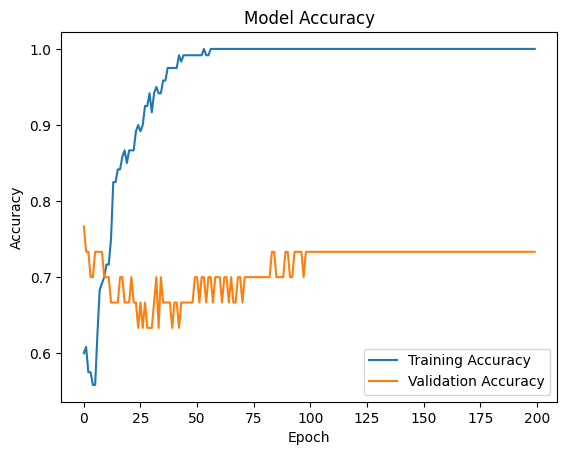

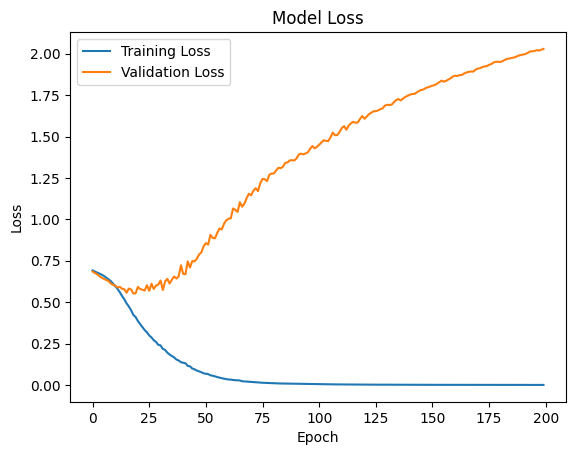

Test Loss: 1.7507
Test Accuracy: 0.7241


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Load and preprocess the SONAR dataset
sonar_df = pd.read_csv("./sonar.csv", header=None)
sonar_df = sonar_df.drop(0)
sonar_df = sonar_df.sample(frac=1).reset_index(drop=True)

X = sonar_df.drop(columns=[60])
y = sonar_df[60]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = np.array(X)
y = tf.keras.utils.to_categorical(y)

train_X, train_y = X[:150], y[:150]
test_X, test_y = X[150:], y[150:]

# Define the neural network architecture
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=64, activation='relu', input_shape=(60,)),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_X, train_y, epochs=200, validation_split=0.2, verbose=1)

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")



In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

sonar_df = pd.read_csv("./sonar.csv", header=None)

sonar_df = sonar_df.drop(0)



sonar_df = sonar_df.sample(frac=1).reset_index(drop=True)
sonar_df
X = sonar_df.drop(columns=[60])
y = sonar_df[60]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = np.array(X)
y = tf.keras.utils.to_categorical(y)  # Convert labels to one-hot encoded format

train_X, train_y = X[:150], y[:150]
test_X, test_y = X[150:], y[150:]

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=64, activation='relu', input_shape=(60,), kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
  tf.keras.layers.Dense(2, activation='softmax')
])


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(train_X, train_y,epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 7.3056 - accuracy: 0.5800
Epoch 2/200
5/5 [==============================] - 0s 6ms/step - loss: 7.0101 - accuracy: 0.5800
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 6.7247 - accuracy: 0.5733
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 6.4486 - accuracy: 0.5733
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 6.1810 - accuracy: 0.5733
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 5.9210 - accuracy: 0.5733
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 5.6692 - accuracy: 0.5733
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 5.4247 - accuracy: 0.5733
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 5.1889 - accuracy: 0.5733
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 4.9603 - accuracy: 0.5933
Epoch 11/200
5/5 [===========

5/5 [==============================] - 0s 3ms/step - loss: 0.6048 - accuracy: 0.8400
Epoch 85/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.8533
Epoch 86/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6230 - accuracy: 0.8067
Epoch 87/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.8267
Epoch 88/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.8133
Epoch 89/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.8400
Epoch 90/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.8267
Epoch 91/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.8267
Epoch 92/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5913 - accuracy: 0.8400
Epoch 93/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5872 - accuracy: 0.8533
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.8533
Epoch 168/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.8267
Epoch 169/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.8533
Epoch 170/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.8267
Epoch 171/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.8533
Epoch 172/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.8933
Epoch 173/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.8267
Epoch 174/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.8800
Epoch 175/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.8200
Epoch 176/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.8533
Epoch 177/200
5/5 [=====

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.8400
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.8667
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.8533
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.8733
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.8533
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.8733
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.8400
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.8667
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.8533
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.8733
Epoch 11/200
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 0.4855 - accuracy: 0.8467
Epoch 85/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.8733
Epoch 86/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.8600
Epoch 87/200
5/5 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.8800
Epoch 88/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.8667
Epoch 89/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8733
Epoch 90/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.8733
Epoch 91/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.8800
Epoch 92/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8667
Epoch 93/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8667
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8867
Epoch 168/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8933
Epoch 169/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8933
Epoch 170/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8867
Epoch 171/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8733
Epoch 172/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8867
Epoch 173/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8733
Epoch 174/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8800
Epoch 175/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8933
Epoch 176/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8800
Epoch 177/200
5/5 [=====

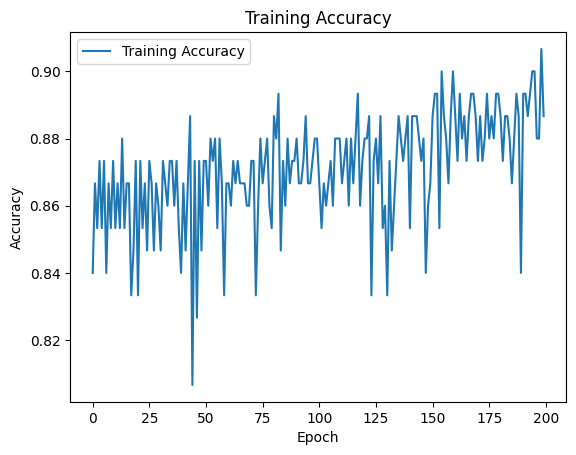

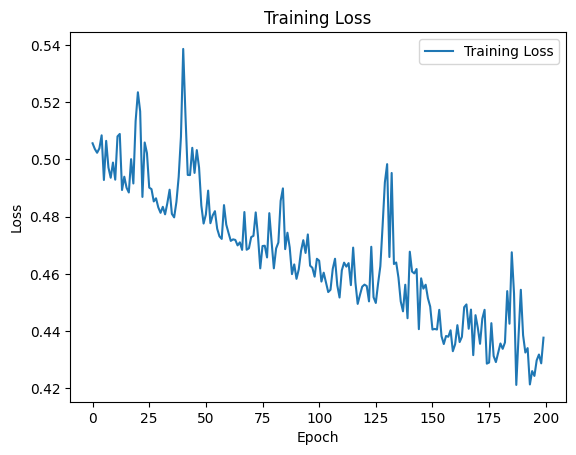

In [35]:
import matplotlib.pyplot as plt

# Train the model and obtain the history
history = model.fit(train_X, train_y, epochs=200)

# Plot the training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [36]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

sonar_df = pd.read_csv("./sonar.csv", header=None)

sonar_df = sonar_df.drop(0)


sonar_df = sonar_df.sample(frac=1).reset_index(drop=True)

X = sonar_df.drop(columns=[60])
y = sonar_df[60]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = np.array(X)
y = tf.keras.utils.to_categorical(y)  

train_X, train_y = X[:150], y[:150]
test_X, test_y = X[150:], y[150:]

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=64, activation='relu', input_shape=(60,)),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(train_X, train_y, 
                    epochs=200, 
                    validation_data=(test_X, test_y),
                    callbacks=[early_stopping])

Epoch 1/200
5/5 [==============================] - 1s 35ms/step - loss: 0.6780 - accuracy: 0.6133 - val_loss: 0.6909 - val_accuracy: 0.4483
Epoch 2/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6414 - accuracy: 0.6133 - val_loss: 0.6986 - val_accuracy: 0.4138
Epoch 3/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6288 - accuracy: 0.5933 - val_loss: 0.7079 - val_accuracy: 0.4138
Epoch 4/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6194 - accuracy: 0.5933 - val_loss: 0.7044 - val_accuracy: 0.4310
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6072 - accuracy: 0.6400 - val_loss: 0.6733 - val_accuracy: 0.5000
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5956 - accuracy: 0.6933 - val_loss: 0.6477 - val_accuracy: 0.6034
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5814 - accuracy: 0.7067 - val_loss: 0.6398 - val_accuracy: 0.6207
Epoch 8/200
5/5 [=========

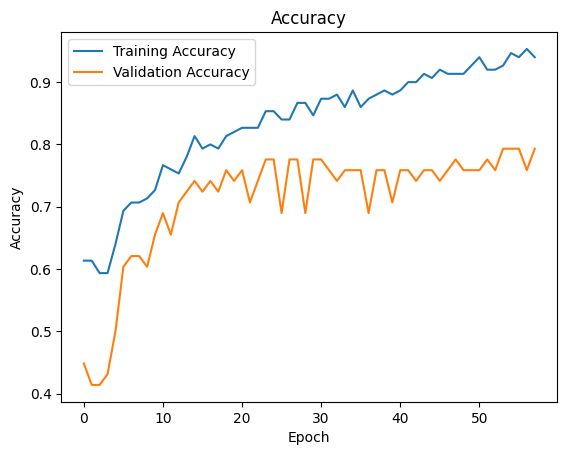

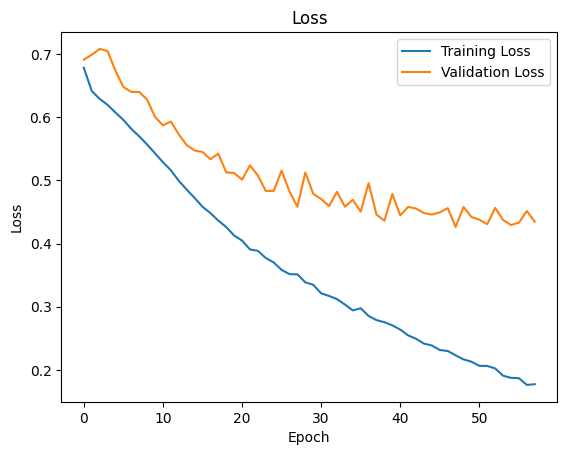

In [37]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

sonar_df = pd.read_csv("./sonar.csv", header=None)
sonar_df = sonar_df.drop(0)
sonar_df = sonar_df.sample(frac=1).reset_index(drop=True)

X = sonar_df.drop(columns=[60])
y = sonar_df[60]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = np.array(X)
y = tf.keras.utils.to_categorical(y)

train_X, train_y = X[:150], y[:150]
test_X, test_y = X[150:], y[150:]

model = tf.keras.Sequential([
  tf.keras.layers.Dropout(0.2, input_shape=(60,)),  # Dropout layer as the input layer with a dropout rate of 0.2
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=200, validation_data=(test_X, test_y))



Epoch 1/200
5/5 [==============================] - 1s 37ms/step - loss: 0.7151 - accuracy: 0.4933 - val_loss: 0.6881 - val_accuracy: 0.5172
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6893 - accuracy: 0.5533 - val_loss: 0.6811 - val_accuracy: 0.5345
Epoch 3/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6893 - accuracy: 0.5667 - val_loss: 0.6735 - val_accuracy: 0.5345
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6655 - accuracy: 0.5667 - val_loss: 0.6654 - val_accuracy: 0.5345
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6823 - accuracy: 0.6200 - val_loss: 0.6597 - val_accuracy: 0.5345
Epoch 6/200
5/5 [==============================] - 0s 9ms/step - loss: 0.6640 - accuracy: 0.5533 - val_loss: 0.6538 - val_accuracy: 0.5517
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6769 - accuracy: 0.5867 - val_loss: 0.6479 - val_accuracy: 0.6207
Epoch 8/200
5/5 [=======

5/5 [==============================] - 0s 7ms/step - loss: 0.5071 - accuracy: 0.7200 - val_loss: 0.4582 - val_accuracy: 0.7931
Epoch 60/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4321 - accuracy: 0.8133 - val_loss: 0.4616 - val_accuracy: 0.7931
Epoch 61/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4674 - accuracy: 0.7800 - val_loss: 0.4620 - val_accuracy: 0.7931
Epoch 62/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4572 - accuracy: 0.8267 - val_loss: 0.4599 - val_accuracy: 0.7931
Epoch 63/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4277 - accuracy: 0.8067 - val_loss: 0.4548 - val_accuracy: 0.7931
Epoch 64/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4900 - accuracy: 0.7533 - val_loss: 0.4597 - val_accuracy: 0.7931
Epoch 65/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4423 - accuracy: 0.8067 - val_loss: 0.4654 - val_accuracy: 0.7759
Epoch 66/200
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.3541 - accuracy: 0.8600 - val_loss: 0.4190 - val_accuracy: 0.7759
Epoch 118/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3667 - accuracy: 0.8467 - val_loss: 0.4136 - val_accuracy: 0.7759
Epoch 119/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4259 - accuracy: 0.7933 - val_loss: 0.3973 - val_accuracy: 0.8103
Epoch 120/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3559 - accuracy: 0.7933 - val_loss: 0.3945 - val_accuracy: 0.8103
Epoch 121/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4218 - accuracy: 0.7800 - val_loss: 0.3979 - val_accuracy: 0.8103
Epoch 122/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4219 - accuracy: 0.8200 - val_loss: 0.4026 - val_accuracy: 0.8103
Epoch 123/200
5/5 [==============================] - 0s 7ms/step - loss: 0.3879 - accuracy: 0.8067 - val_loss: 0.4096 - val_accuracy: 0.8103
Epoch 124/200
5/5 [========

5/5 [==============================] - 0s 8ms/step - loss: 0.3530 - accuracy: 0.8400 - val_loss: 0.3718 - val_accuracy: 0.7931
Epoch 176/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3711 - accuracy: 0.8267 - val_loss: 0.3572 - val_accuracy: 0.8103
Epoch 177/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3713 - accuracy: 0.8267 - val_loss: 0.3463 - val_accuracy: 0.7931
Epoch 178/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3159 - accuracy: 0.8800 - val_loss: 0.3475 - val_accuracy: 0.8276
Epoch 179/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3437 - accuracy: 0.8467 - val_loss: 0.3538 - val_accuracy: 0.8103
Epoch 180/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3205 - accuracy: 0.8600 - val_loss: 0.3611 - val_accuracy: 0.7931
Epoch 181/200
5/5 [==============================] - 0s 9ms/step - loss: 0.3601 - accuracy: 0.8200 - val_loss: 0.3626 - val_accuracy: 0.7931
Epoch 182/200
5/5 [========

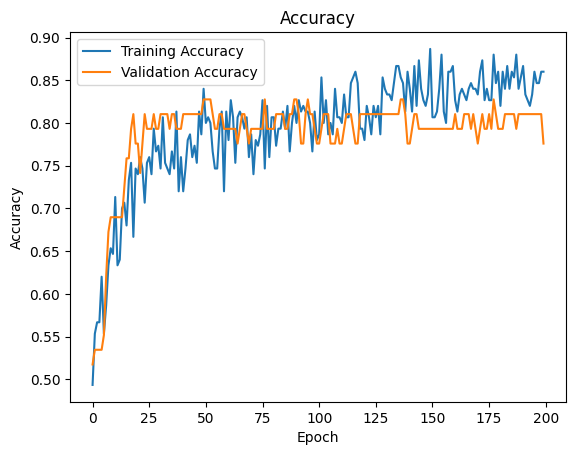

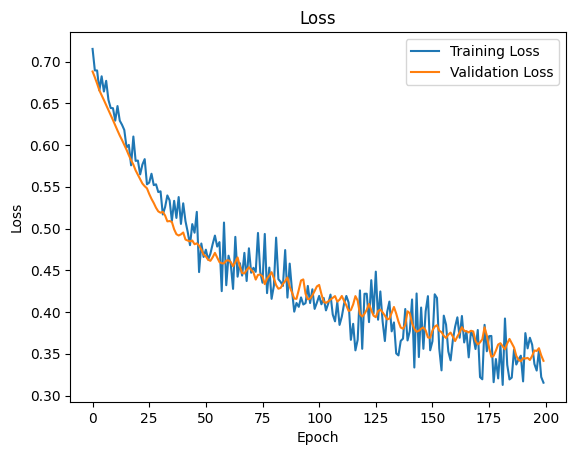

In [39]:
import matplotlib.pyplot as plt


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

